In [1]:
from botorch.acquisition import UpperConfidenceBound
import torch
from botorch.models import SingleTaskGP
from gpytorch import ExactMarginalLogLikelihood
from botorch.fit import fit_gpytorch_mll
from botorch.optim import optimize_acqf
from matplotlib import pyplot as plt
from AD_Hill_System_HMC_Py import observe_blackbox_simulation
import jax
from botorch.utils import draw_sobol_samples

/mnt/c/Users/gemv/repos/kolleg/bayesian-optimization/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mnt/c/Users/gemv/repos/kolleg/bayesian-optimization/.venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
torch.manual_seed(420)

In [ ]:
def blackbox_model(x):
    x = x.numpy().squeeze()
    data = observe_blackbox_simulation(x)
    data = jax.device_get(data)
    print(data)
    return torch.tensor([[(data[2]-data[3])]]).to(torch.double)

In [4]:
bounds = torch.tensor([[12.,13.],[17.,18.]])

In [5]:
num_iterations = 10
initial_points = 1

In [6]:
acq_func = lambda gaussian_process: UpperConfidenceBound(gaussian_process, beta=0.1)

gp_process = lambda x, y: SingleTaskGP(x, y)

In [7]:
train_x = draw_sobol_samples(bounds=bounds, n=1, q=initial_points).squeeze(0).to(torch.double)
train_y = blackbox_model(train_x)
gp = gp_process(train_x, train_y)

for iteration in range(num_iterations-1):
    gp = gp_process(train_x, train_y)
    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    fit_gpytorch_mll(mll)
    
    acqf = acq_func(gp)
    candidate,_ = optimize_acqf(acq_function=acqf, bounds=bounds,raw_samples=200, q=1, num_restarts=50)
    
    new_y = blackbox_model(candidate)
    train_x=torch.cat([train_x, candidate])
    train_y = torch.cat([train_y, new_y])

gp = gp_process(train_x, train_y)
mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
fit_gpytorch_mll(mll)

[array(17.7985333), array(9.33140571), array(19.18435099), array(10.71020073)]


/mnt/c/Users/gemv/repos/kolleg/bayesian-optimization/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


[array(18.03887558), array(12.76997609), array(19.531669), array(14.2624088)]


/mnt/c/Users/gemv/repos/kolleg/bayesian-optimization/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


[array(17.81718677), array(9.46512015), array(19.20951063), array(10.85087423)]


/mnt/c/Users/gemv/repos/kolleg/bayesian-optimization/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


[array(17.73946832), array(8.94549486), array(19.10567065), array(10.30330977)]


/mnt/c/Users/gemv/repos/kolleg/bayesian-optimization/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


[array(17.63610575), array(8.36788449), array(18.97076929), array(9.69201098)]


/mnt/c/Users/gemv/repos/kolleg/bayesian-optimization/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


[array(17.43449641), array(7.45431547), array(18.71447813), array(8.72032489)]


/mnt/c/Users/gemv/repos/kolleg/bayesian-optimization/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


[array(17.27165985), array(6.37345664), array(18.46257588), array(7.54957788)]


/mnt/c/Users/gemv/repos/kolleg/bayesian-optimization/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


[array(17.26508536), array(6.32045425), array(18.45686985), array(7.49701852)]


/mnt/c/Users/gemv/repos/kolleg/bayesian-optimization/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


[array(17.26508536), array(6.32045425), array(18.45686985), array(7.49701852)]


/mnt/c/Users/gemv/repos/kolleg/bayesian-optimization/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


[array(17.26508536), array(6.32045425), array(18.45686985), array(7.49701852)]


/mnt/c/Users/gemv/repos/kolleg/bayesian-optimization/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


ExactMarginalLogLikelihood(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (noise_prior): LogNormalPrior()
      (raw_noise_constraint): GreaterThan(1.000E-04)
    )
  )
  (model): SingleTaskGP(
    (likelihood): GaussianLikelihood(
      (noise_covar): HomoskedasticNoise(
        (noise_prior): LogNormalPrior()
        (raw_noise_constraint): GreaterThan(1.000E-04)
      )
    )
    (mean_module): ConstantMean()
    (covar_module): RBFKernel(
      (lengthscale_prior): LogNormalPrior()
      (raw_lengthscale_constraint): GreaterThan(2.500E-02)
    )
    (outcome_transform): Standardize()
  )
)

In [8]:
import numpy as np
train_x = train_x.numpy()
train_y = train_y.numpy()

In [9]:
train_x, train_y

(array([[15.10823536, 13.59505272],
        [14.83726692, 17.55309868],
        [15.22270012, 13.63655567],
        [14.72737408, 13.5190897 ],
        [14.09827614, 13.44547462],
        [13.0613966 , 13.32326412],
        [12.        , 13.05946827],
        [12.        , 13.        ],
        [12.        , 13.        ],
        [12.        , 13.        ]]),
 array([[ 8.47415027],
        [ 5.26926019],
        [ 8.35863641],
        [ 8.80236088],
        [ 9.27875831],
        [ 9.99415324],
        [10.912998  ],
        [10.95985134],
        [10.95985134],
        [10.95985134]]))

In [10]:
data = []
for x, y in zip(train_x, train_y):
    stretch_dict = {
            'pre_stretches': x,
            'stretch_score': y[0],
        }
    data.append(stretch_dict) 


In [11]:
data

[{'pre_stretches': array([15.10823536, 13.59505272]),
  'stretch_score': np.float64(8.474150266325335)},
 {'pre_stretches': array([14.83726692, 17.55309868]),
  'stretch_score': np.float64(5.2692601914942045)},
 {'pre_stretches': array([15.22270012, 13.63655567]),
  'stretch_score': np.float64(8.358636406529465)},
 {'pre_stretches': array([14.72737408, 13.5190897 ]),
  'stretch_score': np.float64(8.802360882752996)},
 {'pre_stretches': array([14.09827614, 13.44547462]),
  'stretch_score': np.float64(9.278758307571618)},
 {'pre_stretches': array([13.0613966 , 13.32326412]),
  'stretch_score': np.float64(9.994153244503444)},
 {'pre_stretches': array([12.        , 13.05946827]),
  'stretch_score': np.float64(10.912997999007516)},
 {'pre_stretches': array([12., 13.]),
  'stretch_score': np.float64(10.959851337816271)},
 {'pre_stretches': array([12., 13.]),
  'stretch_score': np.float64(10.959851337816271)},
 {'pre_stretches': array([12., 13.]),
  'stretch_score': np.float64(10.959851337816

Saved plot.
Saved plot.


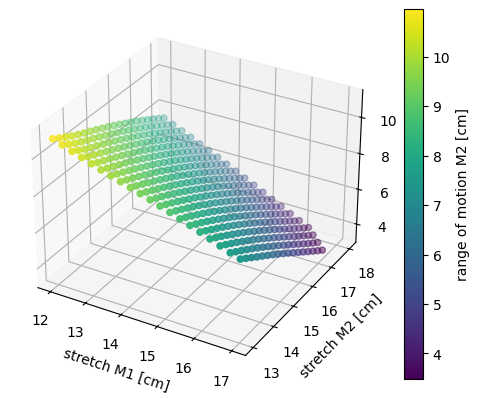

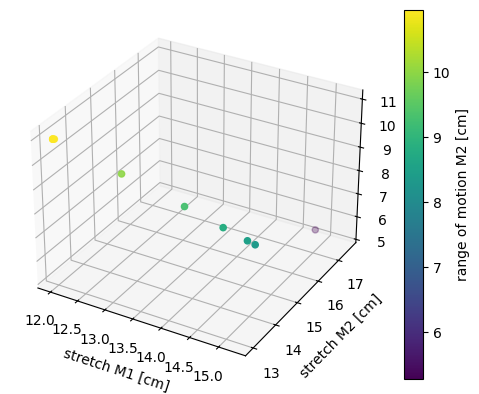

In [12]:
from true_func_plot import plot_stretch_data_3d
plot_stretch_data_3d(data)

In [13]:
def plot_gp(gp, train_x, train_obj, bounds):
    # Create test points for plotting
    test_x = torch.linspace(bounds[0, 0], bounds[1, 0], 100).unsqueeze(-1)
    gp.eval()  # Set GP to evaluation mode
    posterior = gp.posterior(test_x)
    mean = posterior.mean.detach().numpy()
    lower, upper = posterior.mvn.confidence_region()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(test_x.numpy(), blackbox_model(test_x).numpy(), 'r--', label='True function')
    plt.plot(test_x.numpy(), mean, 'b', label='GP mean')
    plt.fill_between(test_x.numpy().flatten(), lower.detach().numpy(), upper.detach().numpy(), alpha=0.2, label='Confidence region')
    plt.scatter(train_x.numpy(), train_obj.numpy(), color='black', label='Training points')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.title('Gaussian Process Model after Bayesian Optimization')
    plt.show()